In [1]:
#Q5 Now include 5 data augmentation techniques appropriate to your dataset and build CNN
on augmented images.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


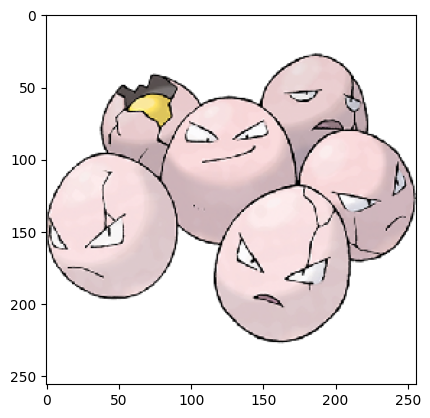

In [3]:
import matplotlib.pyplot as plt
im=plt.imread('/content/drive/MyDrive/TERM-4/DEEP LEARNING/ca/archive (3)/pokemon/pokemon/102.png')
plt.imshow(im)
plt.show()

In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/TERM-4/DEEP LEARNING/ca/archive (3)/pokemon",output="output",seed=1337,ratio=(.8,.2))

Copying files: 819 files [00:08, 98.09 files/s] 


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
train_data=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,)
test_data=ImageDataGenerator(rescale=1/.255)
train_generator= train_data.flow_from_directory(
    "/content/output/train",
    target_size=(150,150),
    batch_size=20,
    class_mode="binary")
validation_generator=test_data.flow_from_directory(
    "/content/output/val",
     target_size=(150,150),
    batch_size=20,
     class_mode="binary")

Found 655 images belonging to 1 classes.
Found 164 images belonging to 1 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
img_input=layers.Input(shape=(150,150,3))
x=layers.Conv2D(16,3,activation='relu')(img_input)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(32,3, activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Flatten()(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model=Model(img_input,output)

In [10]:
import tensorflow

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta


In [12]:
model.compile(loss='binary_crossentropy',
optimizer=Adadelta(),
metrics=['acc'])


In [13]:
history=model.fit(train_generator,
epochs=5,
validation_data=validation_generator,
)

Epoch 1/5
33/33 [==============================] - 15s 434ms/step - loss: 0.7042 - acc: 0.4092 - val_loss: 4.7665 - val_acc: 0.7622
Epoch 2/5
33/33 [==============================] - 14s 430ms/step - loss: 0.6647 - acc: 0.7771 - val_loss: 9.5423e-09 - val_acc: 1.0000
Epoch 3/5
33/33 [==============================] - 14s 423ms/step - loss: 0.6230 - acc: 0.9450 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/5
33/33 [==============================] - 14s 422ms/step - loss: 0.5851 - acc: 0.9969 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/5
33/33 [==============================] - 14s 425ms/step - loss: 0.5434 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000


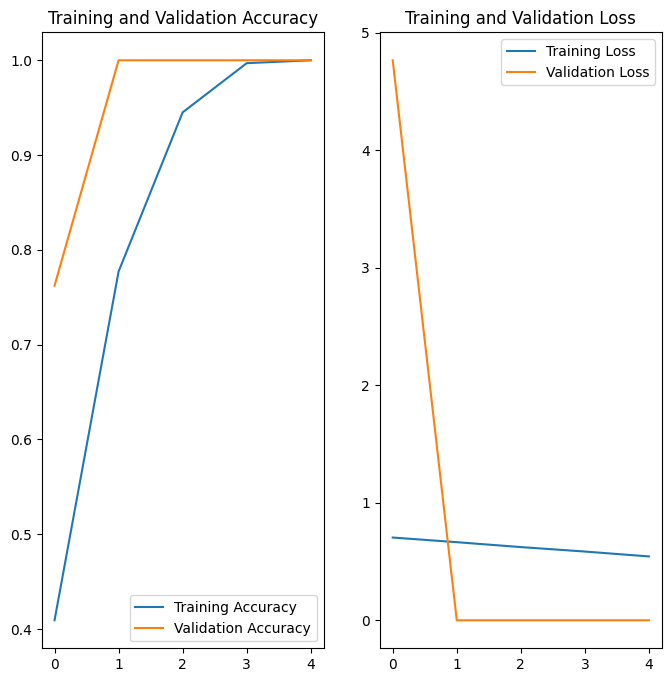

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(5)
plt.figure(figsize=(8,8))



plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()